### Parse the data into array of dictionaries

In [9]:
import csv

exercises = []
with open('./data/strong.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    header = []
    for row in csv_reader:
        if line_count == 0:
            header = row
        else:
            exercises.append(dict(zip(header, row)))
        line_count += 1

### Example of a single exercise

In [10]:
exercises[0]

{'Date': '2017-05-12 19:00:00',
 'Workout Name': 'Afternoon Workout',
 'Exercise Name': 'Bench Press (Barbell)',
 'Set Order': '1',
 'Weight': '50',
 'Reps': '10',
 'Distance': '0',
 'Seconds': '0',
 'Notes': '',
 'Workout Notes': ''}

## Frequency of exercises

In [3]:
from collections import defaultdict

frequenciesOfExercises = defaultdict(int)
for exercise in exercises:
    frequenciesOfExercises[exercise['Exercise Name']] += 1
    
frequenciesOfExercises

defaultdict(int,
            {'Bench Press (Barbell)': 211,
             'Lying Leg Curl (Machine)': 71,
             'Shoulder Press (Machine)': 12,
             'Squat (Smith Machine)': 3,
             'Leg Press': 22,
             'Chin Up (Assisted)': 251,
             'Triceps Extension': 90,
             'Total Abdominal ': 22,
             'Decline Bench Press (Barbell)': 73,
             'Flat Leg Raise': 25,
             'Bent Over Row (Barbell)': 51,
             'Bench Press (Dumbbell)': 30,
             'Hanging Leg Raise': 18,
             'Bicep Curl (Barbell)': 80,
             'Deadlift (Barbell)': 123,
             'Russian Twist': 10,
             'Seated Row (Cable)': 51,
             'kettlebell': 6,
             'Leg Extension (Machine)': 74,
             'Plank': 35,
             'Chest Press ': 15,
             'chest press pulley ': 3,
             'Crunch': 12,
             'Bicycle Crunch': 5,
             'Lat Pulldown (Cable)': 79,
             'Bicep Curl (

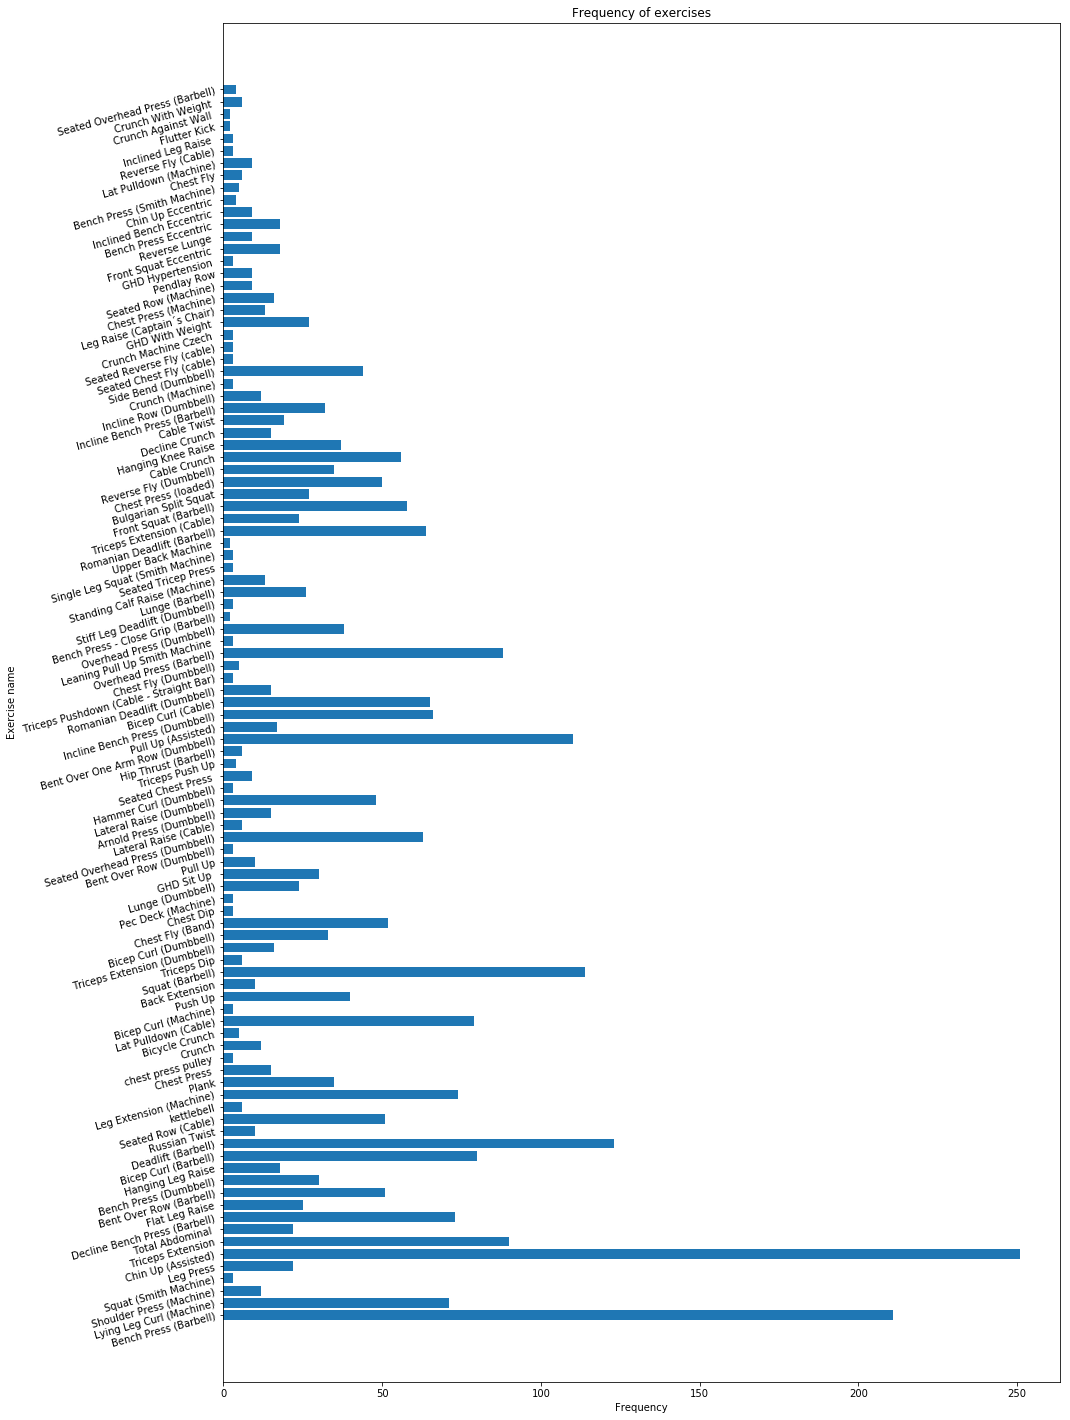

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 25]

exercises_names = list(frequenciesOfExercises.keys())
frequencies = [frequenciesOfExercises[exercise_name] for exercise_name in frequenciesOfExercises]

plt.barh(exercises_names, frequencies)
plt.yticks(exercises_names, rotation=15)
plt.xlabel('Frequency')
plt.ylabel('Exercise name')
plt.title('Frequency of exercises')
plt.show()


## Progression of assisted chin-ups

### Select only assisted chin-ups

In [5]:
import datetime

plt.rcParams['figure.figsize'] = [20, 30]

exercise_name = "Chin Up (Assisted)"
assisted_chin_ups = [exercise for exercise in exercises if exercise['Exercise Name'] == exercise_name]

for exercise in assisted_chin_ups:
    exercise['Date'] = datetime.datetime.strptime(exercise['Date'], '%Y-%m-%d %H:%M:%S').date()
    
assisted_chin_ups

[{'Date': datetime.date(2017, 6, 26),
  'Workout Name': 'Afternoon Workout',
  'Exercise Name': 'Chin Up (Assisted)',
  'Set Order': '1',
  'Weight': '49',
  'Reps': '10',
  'Distance': '0',
  'Seconds': '0',
  'Notes': '',
  'Workout Notes': ''},
 {'Date': datetime.date(2017, 6, 26),
  'Workout Name': 'Afternoon Workout',
  'Exercise Name': 'Chin Up (Assisted)',
  'Set Order': '2',
  'Weight': '49',
  'Reps': '10',
  'Distance': '0',
  'Seconds': '0',
  'Notes': '',
  'Workout Notes': ''},
 {'Date': datetime.date(2017, 6, 26),
  'Workout Name': 'Afternoon Workout',
  'Exercise Name': 'Chin Up (Assisted)',
  'Set Order': '3',
  'Weight': '42',
  'Reps': '10',
  'Distance': '0',
  'Seconds': '0',
  'Notes': '',
  'Workout Notes': ''},
 {'Date': datetime.date(2018, 12, 7),
  'Workout Name': 'New Routine #1',
  'Exercise Name': 'Chin Up (Assisted)',
  'Set Order': '1',
  'Weight': '0',
  'Reps': '6',
  'Distance': '0',
  'Seconds': '0',
  'Notes': '',
  'Workout Notes': ''},
 {'Date': dat

### Group exercises within one day

This is needed because each set is on its own line and we care only about the aggregate for the whole day.

In [6]:
from collections import OrderedDict
grouped_exercises_by_date = OrderedDict()

for exercise in assisted_chin_ups:
    if exercise['Date'] in grouped_exercises_by_date:
        grouped_exercises_by_date[exercise['Date']].append(exercise)
    else:
        grouped_exercises_by_date[exercise['Date']] = [exercise]
    
grouped_exercises_by_date

OrderedDict([(datetime.date(2017, 6, 26),
              [{'Date': datetime.date(2017, 6, 26),
                'Workout Name': 'Afternoon Workout',
                'Exercise Name': 'Chin Up (Assisted)',
                'Set Order': '1',
                'Weight': '49',
                'Reps': '10',
                'Distance': '0',
                'Seconds': '0',
                'Notes': '',
                'Workout Notes': ''},
               {'Date': datetime.date(2017, 6, 26),
                'Workout Name': 'Afternoon Workout',
                'Exercise Name': 'Chin Up (Assisted)',
                'Set Order': '2',
                'Weight': '49',
                'Reps': '10',
                'Distance': '0',
                'Seconds': '0',
                'Notes': '',
                'Workout Notes': ''},
               {'Date': datetime.date(2017, 6, 26),
                'Workout Name': 'Afternoon Workout',
                'Exercise Name': 'Chin Up (Assisted)',
                'Set O

### Calculate amount lifted within a day

In [7]:
weights = []
dates = []
weight_of_person_training = 95

for date in grouped_exercises_by_date:
    exercises_within_date = grouped_exercises_by_date[date]
    weight = 0
    for exercise in exercises_within_date:
        weight += (weight_of_person_training - float(exercise['Weight'])) * float(exercise['Reps'])
    weights.append(weight)
    dates.append(date)

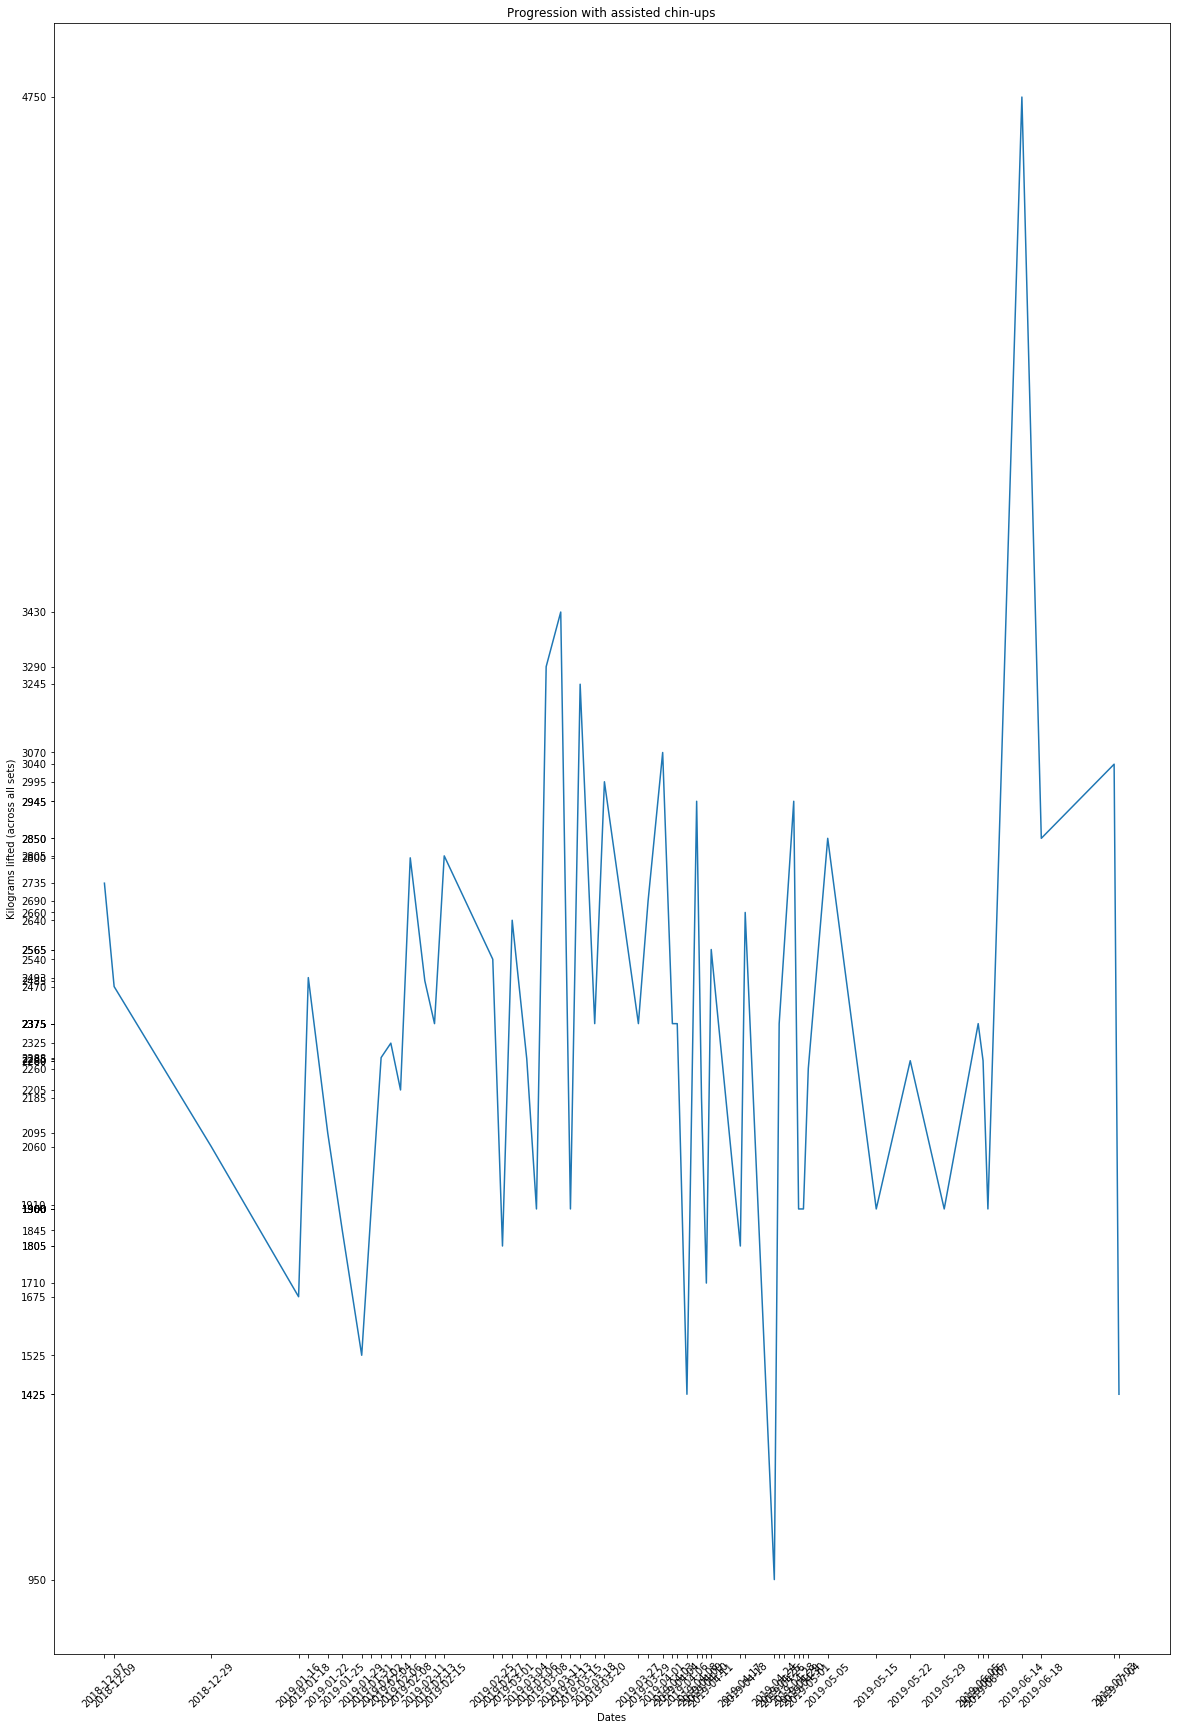

In [8]:
plt.plot(dates[1:], weights[1:], scaley=True)
plt.yticks(weights[1:])
plt.xticks(dates[1:], dates[1:], rotation=45)
plt.ylabel("Kilograms lifted (across all sets)")
plt.xlabel("Dates")
plt.title("Progression with assisted chin-ups")
plt.show()